# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from urllib.request import urlopen

# Import API key
from api_keys import key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
out_file = "city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

In [3]:
def city_data(city, key):

    payload = {'q' : city,
               'APPID' : key
              }
    resp = requests.get("https://api.openweathermap.org/data/2.5/weather", params=payload)
    
    city_data = {'name' : resp.json()['name'],
                 'lat' : resp.json()['coord']['lat'],
                 'temp' : resp.json()['main']['temp_max'],
                 'humidity' : resp.json()['main']['humidity'],
                 'cloudiness' : resp.json()['clouds']['all'],
                 'wind_speed' : resp.json()['wind']['speed']
                }

    return city_data

In [4]:

c_data = []

for city in cities:
    try: 
        x = city_data(city, key)
        c_data.append(x)
        
        print(x)
        
        time.sleep(1.01)
        
    except:
        print('City not Found')

{'name': 'Turukhansk', 'lat': 65.8, 'temp': 241.62, 'humidity': 99, 'cloudiness': 67, 'wind_speed': 0.94}
{'name': 'Bluff', 'lat': -23.58, 'temp': 301.35, 'humidity': 43, 'cloudiness': 0, 'wind_speed': 8.11}
{'name': 'Atar', 'lat': 20.52, 'temp': 291.03, 'humidity': 17, 'cloudiness': 0, 'wind_speed': 2.04}
{'name': 'Hermanus', 'lat': -34.42, 'temp': 287.59, 'humidity': 86, 'cloudiness': 26, 'wind_speed': 1.34}
{'name': 'Atuona', 'lat': -9.8, 'temp': 300.92, 'humidity': 70, 'cloudiness': 9, 'wind_speed': 7.22}
{'name': 'Ancud', 'lat': -41.87, 'temp': 287.15, 'humidity': 87, 'cloudiness': 90, 'wind_speed': 9.3}
{'name': 'Alyangula', 'lat': -13.85, 'temp': 303.15, 'humidity': 79, 'cloudiness': 49, 'wind_speed': 4.6}
{'name': 'Punta Arenas', 'lat': -53.16, 'temp': 285.15, 'humidity': 66, 'cloudiness': 90, 'wind_speed': 5.7}
{'name': 'Ribeira Grande', 'lat': 38.52, 'temp': 289.19, 'humidity': 93, 'cloudiness': 100, 'wind_speed': 11.62}
{'name': 'Chuy', 'lat': -33.69, 'temp': 294.76, 'humidi

[{'name': 'Turukhansk',
  'lat': 65.8,
  'temp': 241.62,
  'humidity': 99,
  'cloudiness': 67,
  'wind_speed': 0.94},
 {'name': 'Bluff',
  'lat': -23.58,
  'temp': 301.35,
  'humidity': 43,
  'cloudiness': 0,
  'wind_speed': 8.11},
 {'name': 'Atar',
  'lat': 20.52,
  'temp': 291.03,
  'humidity': 17,
  'cloudiness': 0,
  'wind_speed': 2.04},
 {'name': 'Hermanus',
  'lat': -34.42,
  'temp': 287.59,
  'humidity': 86,
  'cloudiness': 26,
  'wind_speed': 1.34},
 {'name': 'Atuona',
  'lat': -9.8,
  'temp': 300.92,
  'humidity': 70,
  'cloudiness': 9,
  'wind_speed': 7.22},
 {'name': 'Ancud',
  'lat': -41.87,
  'temp': 287.15,
  'humidity': 87,
  'cloudiness': 90,
  'wind_speed': 9.3},
 {'name': 'Alyangula',
  'lat': -13.85,
  'temp': 303.15,
  'humidity': 79,
  'cloudiness': 49,
  'wind_speed': 4.6},
 {'name': 'Punta Arenas',
  'lat': -53.16,
  'temp': 285.15,
  'humidity': 66,
  'cloudiness': 90,
  'wind_speed': 5.7},
 {'name': 'Ribeira Grande',
  'lat': 38.52,
  'temp': 289.19,
  'humidit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
with open(out_file, 'w', newline='') as csvfile:
    fieldnames = list(c_data[0].keys())
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in c_data:
    
        writer.writerow(i)

In [22]:
df = pd.read_csv(out_file)
df

,name,lat,temp,humidity,cloudiness,wind_speed
0,Turukhansk,65.80,241.62,99,67,0.94
1,Bluff,-23.58,301.35,43,0,8.11
2,Atar,20.52,291.03,17,0,2.04
3,Hermanus,-34.42,287.59,86,26,1.34
4,Atuona,-9.80,300.92,70,9,7.22
...,...,...,...,...,...,...
561,Penukonda,14.08,292.93,82,70,2.14
562,Lagoa,37.14,289.82,72,100,2.60
563,Coquimbo,-29.95,290.15,72,0,6.70
564,Lima,-12.06,296.15,69,96,5.10


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

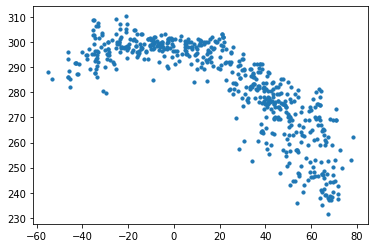

In [24]:
plt.scatter(df["lat"], df["temp"], marker="o", s=10)
plt.show()

#### Latitude vs. Humidity Plot

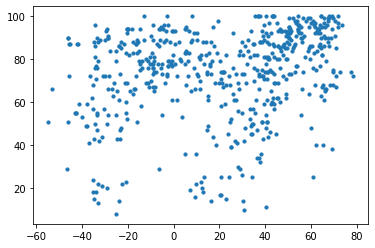

In [25]:
plt.scatter(df["lat"], df["humidity"], marker="o", s=10)
plt.show()

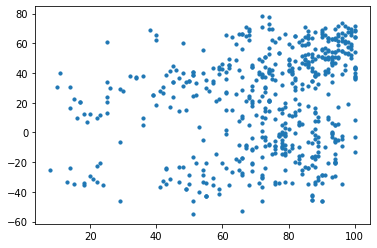

In [28]:
plt.scatter( df["humidity"], df["lat"],marker="o", s=10)
plt.show()

#### Latitude vs. Cloudiness Plot

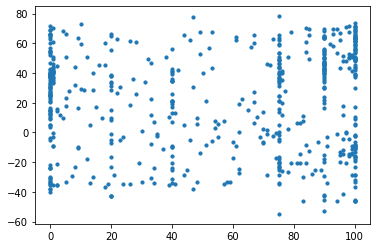

In [27]:
plt.scatter(df["cloudiness"], df["lat"],marker="o", s=10)
plt.show()

#### Latitude vs. Wind Speed Plot

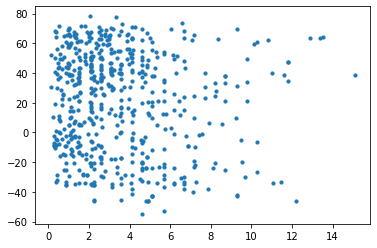

In [30]:
plt.scatter(df["wind_speed"], df["lat"],marker="o", s=10)
plt.show()